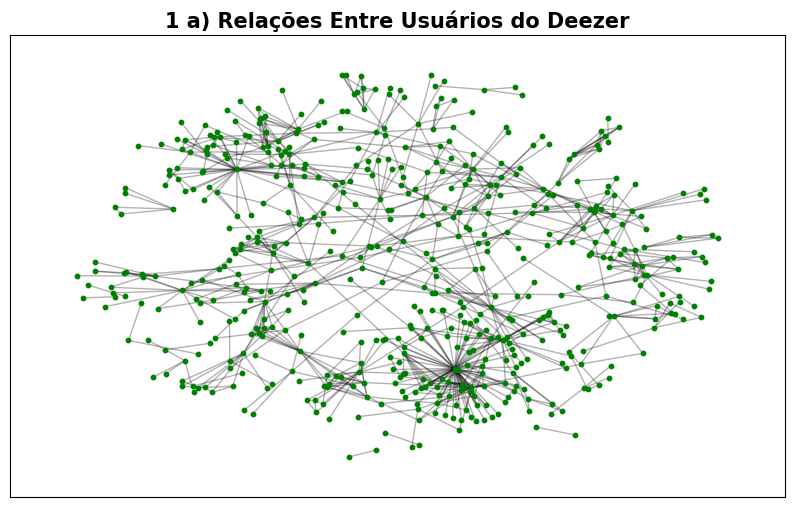

Grau médio: 6.5593


1 c) Calcule o número de componentes do grafo.
Quantidade de componentes: 1




1 f) Quantidade de Pontes encontradas: 6470
1 f) Pontes encontradas: [(3001, 27103), (1, 16675), (1, 22658), (1, 6133), (1, 20208), (1, 3153), (1, 11706), (1, 3290), (1, 3364), (1, 21365), (1, 16211), (1, 5789), (1, 23558), (1, 23019), (1, 21500), (1, 951), (1, 14220), (2514, 24328), (2514, 25511), (190, 25465), (2003, 50), (2003, 15502), (2003, 24898), (2003, 8042), (2003, 27889), (2003, 16710), (2003, 22447), (2003, 18028), (2003, 15859), (2003, 6187), (2003, 23025), (2003, 9817), (2003, 7697), (2003, 21591), (11290, 3688), (11290, 25861), (24836, 399), (24836, 1671), (24836, 3174), (24836, 5478), (24836, 9118), (24836, 10305), (24836, 12946), (24836, 14864), (24836, 21417), (24836, 21594), (24836, 21599), (24836, 22924), (24836, 24249), (24836, 25964), (18843, 7181), (18843, 14211), (18843, 27322), (10646, 532), (10646, 1503), (10646, 1829), (10646, 2795), (10646, 4059), (10646, 4903), (10646, 6027), (10646, 6114), (10646, 22615), (10646, 14081), (10646, 26018), (10646, 25671), (106

In [ ]:
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import plotly.graph_objects as go
import numpy as np

# Matheus S. Tallmann e Winicios Ivan Ulrich

def importacao_grafo(caminho, origem, destino, dirigido):
    arestas = pd.read_csv(caminho)
    
    if dirigido:
        g = nx.from_pandas_edgelist(arestas, source=origem, target=destino, create_using=nx.DiGraph())
    else:
        g = nx.from_pandas_edgelist(arestas, source=origem, target=destino, create_using=nx.Graph())
    
    return g

# Criando/importando o grafo de Relações de Usuários do Deezer
grafoDeezer = importacao_grafo('C:\\Users\\Matheus\\Documents\\Grafos\\deezer_europe\\deezer_europe_edges.csv','node_1','node_2', False)

###################################################################################################################################################################################
###################################################################################################################################################################################

# Questão 1 a) 
# Forneça a representação visual do grafo 
def desenhar_grafo(grafo, titulo, amostra):
    if amostra and len(grafo.nodes) > amostra:
        nos_amostrados = list(grafo.nodes)[:amostra]
        grafo = grafo.subgraph(nos_amostrados)
    plt.figure(figsize=(10, 6)) #Tamanho em polegadas#
    pos = nx.spring_layout(grafo, seed=40, k=0.15)
    nx.draw_networkx_nodes(grafo, pos, node_size=10, node_color="green")    

    # Desenhar arestas com tamanho e opacidade personalizados
    nx.draw_networkx_edges(
        grafo,
        pos,
        width=1,              
        alpha=0.3,            
        edge_color="black"
    )
    plt.title(titulo, fontsize=15, fontweight='bold')
    plt.show()


desenhar_grafo(grafoDeezer,'1 a) Relações Entre Usuários do Deezer',550)

###################################################################################################################################################################################
###################################################################################################################################################################################

# Questão 1 b) 
# Calcule e gere um gráfico da distribuição do grau dos vértices desse grafo. 
def grafico_distribuicao_graus(grafo, titulo):    
    graus = [grau for _, grau in grafo.degree()]
    
    # Faz a lista de "Grau: quantidade" e aparta nas variáveis abaixo
    quantidade = Counter(graus)
    graus_unicos = list(quantidade.keys())
    valores_quantidade = list(quantidade.values())
    
    # Criar o gráfico
    fig = go.Figure(data=[
        go.Bar(
            x=graus_unicos,
            y=valores_quantidade,
            text=valores_quantidade,  
            textposition='outside',   # Posiciona os textos fora das barras
            marker=dict(
                color=valores_quantidade,  # Baseia a cor na frequência
                colorscale=[
                    [0, 'darkgreen'],  
                    [1, 'lightgreen']  
                ]
            )
        )
    ])
    
    fig.update_layout(
    title=dict(
        text=f"1 b) Distribuição de Grau - {titulo}",
        font=dict(size=20, color="black", family="Arial", weight="bold"),  
        x=0.5  # Centraliza o título
    ),
    xaxis=dict(
        title="Grau",
        titlefont=dict(size=16, color="black", family="Arial", weight ="bold"),
        rangeslider=dict(visible=True)  
    ),
    yaxis=dict(
        title="Quantidade",
        titlefont=dict(size=16, color="black", family="Arial", weight ="bold")  
    ),
    bargap=0.15  # Espaçamento entre as barras
    )

    fig.show()   
  
grafico_distribuicao_graus(grafoDeezer,'Grafo Deezer')


# Calcule também o grau médio do grafo.
distribuicao_grau_entrada = [grau for _, grau in grafoDeezer.degree()]
grau_medio_entrada = sum(distribuicao_grau_entrada) / len(distribuicao_grau_entrada)
print(f"Grau médio: {grau_medio_entrada:.4f}\n\n")

# distribuicao_grau_saida = [grau for _, grau in grafoDeezer.out_degree()]
# grau_medio_saida = sum(distribuicao_grau_saida) / len(distribuicao_grau_saida)
# print(f"Grau médio Saída: {grau_medio_saida:.4f}\n\n")

###################################################################################################################################################################################
###################################################################################################################################################################################


# 1 c) Calcule o número de componentes do grafo.
print('1 c) Calcule o número de componentes do grafo.')
quantidade_componentes = list(nx.connected_components(grafoDeezer))
print(f"Quantidade de componentes: {len(quantidade_componentes)}\n\n")

# 1 d) Gere um gráfico com a distribuição do tamanho dos componentes do grafo.
def grafico_tamanho_componentes_agrupados(grafo, titulo):    
    componentes_fortes = list(nx.connected_components(grafo))
    tamanhos_fortes = [len(componente) for componente in componentes_fortes]
    frequencias_fortes = Counter(tamanhos_fortes)
    tamanhos_unicos_fortes = list(frequencias_fortes.keys())
    valores_quantidade_fortes = list(frequencias_fortes.values())

    # Criar o gráfico para Componentes Fortemente Conectados
    fig_fortes = go.Figure(data=[
        go.Bar(
            x=tamanhos_unicos_fortes,
            y=valores_quantidade_fortes,
            text=valores_quantidade_fortes,  # Adiciona os valores das frequências
            textposition='outside',   # Posiciona os textos fora das barras
            marker=dict(
                color=valores_quantidade_fortes,  # Baseia a cor na frequência
                colorscale=[
                    [0, 'darkgreen'],  # Verde escuro no início do gradiente
                    [1, 'lightgreen']  # Verde claro no final do gradiente
                    ]
            )
        )
    ])
    fig_fortes.update_layout(
        title=dict(
            text=f"1 d) Distribuição de Tamanhos de Componentes - {titulo}",
            font=dict(size=20, color="black", family="Arial", weight ="bold"),
            x=0.5  # Centraliza o título
        ),
        xaxis=dict(
            title="Tamanho do Componente",
            titlefont=dict(size=16, color="black", family="Arial", weight ="bold"),
            rangeslider=dict(visible=True)  # Habilita barra de rolagem
        ),
        yaxis=dict(
            title="Quantidade de Componentes",
            titlefont=dict(size=16, color="black", family="Arial", weight ="bold")
        ),
        bargap=0.15  # Espaçamento entre as barras
    
    )
    fig_fortes.show()


grafico_tamanho_componentes_agrupados(grafoDeezer,'Grafo Deezer')
###################################################################################################################################################################################
###################################################################################################################################################################################

# 1 e) Calcule a distância média e a distribuição das distâncias de todos os vértices da rede.

def grafico_distancia_pares_rapido(grafo, dirigido, titulo, n_amostras=1000):
    """
    Calcula a distância média e a distribuição das distâncias entre vértices, com otimizações para grafos grandes.
    """
    # Amostragem de distâncias
    if dirigido:
        grafo = grafo.to_directed()
    else:
        grafo = grafo.to_undirected()

    todas_distancias = amostrar_distancias(grafo, n_amostras)

    # Filtrar distâncias finitas
    todas_distancias = [d for d in todas_distancias if d < float('inf')]

    # Calcular a distância média
    distancia_media = np.mean(todas_distancias)

    # Contar a frequência de cada distância
    distribuicao = Counter(todas_distancias)
    distancias_unicas = list(distribuicao.keys())
    frequencias = list(distribuicao.values())

    # Criar o gráfico de distribuição das distâncias com Plotly
    fig = go.Figure(data=[
        go.Bar(
            x=distancias_unicas,
            y=frequencias,
            text=frequencias,
            textposition='outside',
            marker=dict(
                color=frequencias,
                colorscale="Viridis"  # Escala de cores
            )
        )
    ])
    fig.update_layout(
        title=dict(
            text=f"1 e) Distribuição das Distâncias - {titulo}",
            font=dict(size=20, color="black", family="Arial"),
            x=0.5  # Centraliza o título
        ),
        xaxis=dict(
            title="Distância",
            titlefont=dict(size=16, color="black"),
            rangeslider=dict(visible=True)  # Habilita barra de rolagem
        ),
        yaxis=dict(
            title="Frequência",
            titlefont=dict(size=16, color="black")
        ),
        bargap=0.15  # Espaçamento entre barras
    )
    fig.show()

    return distancia_media

def amostrar_distancias(grafo, n_amostras=1000):
    """
    Calcula distâncias a partir de um subconjunto aleatório de vértices.
    """
    amostras = random.sample(list(grafo.nodes), min(n_amostras, len(grafo.nodes)))
    todas_distancias = []
    for origem in amostras:
        distancias = nx.single_source_shortest_path_length(grafo, origem)
        todas_distancias.extend(distancias.values())
    return todas_distancias

grafico_distancia_pares_rapido(grafoDeezer, False, 'Grafo Deezer', 500)


# grafico_distancia_pares(grafoDeezer, False, 'Grafo Deezer')

###################################################################################################################################################################################
###################################################################################################################################################################################

# 1 f) Implemente uma abordagem para encontrar arestas com grandes chances de serem pontes.
pontes = list(nx.bridges(grafoDeezer))
print(f"1 f) Quantidade de Pontes encontradas: {len(pontes)}")
print(f"1 f) Pontes encontradas: {pontes}")
###################################################################################################################################################################################
###################################################################################################################################################################################



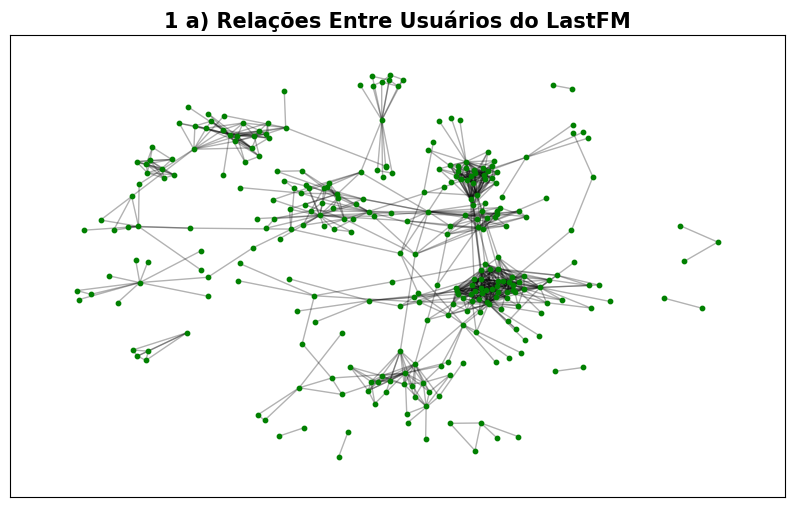

Grau médio: 7.2943


1 c) Calcule o número de componentes do grafo.
Quantidade de componentes: 1




1 f) Quantidade de Pontes encontradas: 1929
1 f) Pontes encontradas: [(0, 747), (1, 580), (4257, 180), (4257, 510), (4257, 1788), (4257, 5286), (2194, 3605), (6478, 4535), (2639, 2353), (2639, 5975), (2639, 3739), (6, 4405), (4560, 5221), (4560, 7576), (5060, 2046), (4433, 949), (4433, 2364), (2900, 1687), (5943, 2592), (4, 5770), (5, 5454), (5454, 127), (5454, 3280), (5454, 4881), (5454, 7394), (5454, 6244), (6283, 7000), (1551, 353), (167, 5889), (7, 6243), (7, 428), (177, 1145), (2854, 1418), (2854, 1726), (2854, 1822), (2854, 2392), (2854, 4690), (2854, 3619), (2854, 3626), (2854, 3124), (2854, 2888), (2854, 3914), (2854, 5133), (2854, 4501), (2854, 3275), (2854, 6826), (6250, 954), (6250, 3111), (6250, 6939), (2142, 1245), (2142, 2779), (8, 1686), (9, 4481), (9, 6053), (1795, 99), (1795, 2827), (1795, 5470), (1795, 5361), (1795, 7543), (6441, 1819), (10, 5489), (618, 991), (1325, 7259), (4919, 6910), (5274, 292), (5274, 698), (5274, 6749), (3807, 220), (3807, 5348), (13, 5385), (1

In [5]:
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import plotly.graph_objects as go
import numpy as np

# Matheus S. Tallmann e Winicios Ivan Ulrich

def importacao_grafo(caminho, origem, destino, dirigido):
    arestas = pd.read_csv(caminho)
    
    if dirigido:
        g = nx.from_pandas_edgelist(arestas, source=origem, target=destino, create_using=nx.DiGraph())
    else:
        g = nx.from_pandas_edgelist(arestas, source=origem, target=destino, create_using=nx.Graph())
    
    return g

# Criando/importando o grafo de Relações de Usuários do LastFM
grafoLastFM = importacao_grafo('C:\\Users\\Matheus\\Documents\\Grafos\\lasftm_asia\\lastfm_asia_edges.csv','node_1','node_2', False)
###################################################################################################################################################################################
###################################################################################################################################################################################

# Questão 1 a) 
# Forneça a representação visual do grafo 
def desenhar_grafo(grafo, titulo, amostra):
    if amostra and len(grafo.nodes) > amostra:
        nos_amostrados = list(grafo.nodes)[:amostra]
        grafo = grafo.subgraph(nos_amostrados)
    plt.figure(figsize=(10, 6)) #Tamanho em polegadas#
    pos = nx.spring_layout(grafo, seed=40, k=0.15)
    nx.draw_networkx_nodes(grafo, pos, node_size=10, node_color="green")    

    # Desenhar arestas com tamanho e opacidade personalizados
    nx.draw_networkx_edges(
        grafo,
        pos,
        width=1,              
        alpha=0.3,            
        edge_color="black"
    )
    plt.title(titulo, fontsize=15, fontweight='bold')
    plt.show()


desenhar_grafo(grafoLastFM,'1 a) Relações Entre Usuários do LastFM',300)

###################################################################################################################################################################################
###################################################################################################################################################################################

# Questão 1 b) 
# Calcule e gere um gráfico da distribuição do grau dos vértices desse grafo. 
def grafico_distribuicao_graus(grafo, titulo):    
    graus = [grau for _, grau in grafo.degree()]
    
    # Faz a lista de "Grau: quantidade" e aparta nas variáveis abaixo
    quantidade = Counter(graus)
    graus_unicos = list(quantidade.keys())
    valores_quantidade = list(quantidade.values())
    
    # Criar o gráfico
    fig = go.Figure(data=[
        go.Bar(
            x=graus_unicos,
            y=valores_quantidade,
            text=valores_quantidade,  
            textposition='outside',   # Posiciona os textos fora das barras
            marker=dict(
                color=valores_quantidade,  # Baseia a cor na frequência
                colorscale=[
                    [0, 'darkgreen'],  
                    [1, 'lightgreen']  
                ]
            )
        )
    ])
    
    fig.update_layout(
    title=dict(
        text=f"1 b) Distribuição de Grau - {titulo}",
        font=dict(size=20, color="black", family="Arial", weight="bold"),  
        x=0.5  # Centraliza o título
    ),
    xaxis=dict(
        title="Grau",
        titlefont=dict(size=16, color="black", family="Arial", weight ="bold"),
        rangeslider=dict(visible=True)  
    ),
    yaxis=dict(
        title="Quantidade",
        titlefont=dict(size=16, color="black", family="Arial", weight ="bold")  
    ),
    bargap=0.15  # Espaçamento entre as barras
    )

    fig.show()   
  
grafico_distribuicao_graus(grafoLastFM,'Grafo LastFM')


# Calcule também o grau médio do grafo.
distribuicao_grau_entrada = [grau for _, grau in grafoLastFM.degree()]
grau_medio_entrada = sum(distribuicao_grau_entrada) / len(distribuicao_grau_entrada)
print(f"Grau médio: {grau_medio_entrada:.4f}\n\n")

# distribuicao_grau_saida = [grau for _, grau in grafoLastFM.out_degree()]
# grau_medio_saida = sum(distribuicao_grau_saida) / len(distribuicao_grau_saida)
# print(f"Grau médio Saída: {grau_medio_saida:.4f}\n\n")

###################################################################################################################################################################################
###################################################################################################################################################################################


# 1 c) Calcule o número de componentes do grafo.
print('1 c) Calcule o número de componentes do grafo.')
quantidade_componentes = list(nx.connected_components(grafoLastFM))
print(f"Quantidade de componentes: {len(quantidade_componentes)}\n\n")

# 1 d) Gere um gráfico com a distribuição do tamanho dos componentes do grafo.
def grafico_tamanho_componentes_agrupados(grafo, titulo):    
    componentes_fortes = list(nx.connected_components(grafo))
    tamanhos_fortes = [len(componente) for componente in componentes_fortes]
    frequencias_fortes = Counter(tamanhos_fortes)
    tamanhos_unicos_fortes = list(frequencias_fortes.keys())
    valores_quantidade_fortes = list(frequencias_fortes.values())

    # Criar o gráfico para Componentes Fortemente Conectados
    fig_fortes = go.Figure(data=[
        go.Bar(
            x=tamanhos_unicos_fortes,
            y=valores_quantidade_fortes,
            text=valores_quantidade_fortes,  # Adiciona os valores das frequências
            textposition='outside',   # Posiciona os textos fora das barras
            marker=dict(
                color=valores_quantidade_fortes,  # Baseia a cor na frequência
                colorscale=[
                    [0, 'darkgreen'],  # Verde escuro no início do gradiente
                    [1, 'lightgreen']  # Verde claro no final do gradiente
                    ]
            )
        )
    ])
    fig_fortes.update_layout(
        title=dict(
            text=f"1 d) Distribuição de Tamanhos de Componentes - {titulo}",
            font=dict(size=20, color="black", family="Arial", weight ="bold"),
            x=0.5  # Centraliza o título
        ),
        xaxis=dict(
            title="Tamanho do Componente",
            titlefont=dict(size=16, color="black", family="Arial", weight ="bold"),
            rangeslider=dict(visible=True)  # Habilita barra de rolagem
        ),
        yaxis=dict(
            title="Quantidade de Componentes",
            titlefont=dict(size=16, color="black", family="Arial", weight ="bold")
        ),
        bargap=0.15  # Espaçamento entre as barras
    
    )
    fig_fortes.show()


grafico_tamanho_componentes_agrupados(grafoLastFM,'Grafo LastFM')
###################################################################################################################################################################################
###################################################################################################################################################################################

# 1 e) Calcule a distância média e a distribuição das distâncias de todos os vértices da rede.

def grafico_distancia_pares_rapido(grafo, dirigido, titulo, n_amostras=1000):
    """
    Calcula a distância média e a distribuição das distâncias entre vértices, com otimizações para grafos grandes.
    """
    # Amostragem de distâncias
    if dirigido:
        grafo = grafo.to_directed()
    else:
        grafo = grafo.to_undirected()

    todas_distancias = amostrar_distancias(grafo, n_amostras)

    # Filtrar distâncias finitas
    todas_distancias = [d for d in todas_distancias if d < float('inf')]

    # Calcular a distância média
    distancia_media = np.mean(todas_distancias)

    # Contar a frequência de cada distância
    distribuicao = Counter(todas_distancias)
    distancias_unicas = list(distribuicao.keys())
    frequencias = list(distribuicao.values())

    # Criar o gráfico de distribuição das distâncias com Plotly
    fig = go.Figure(data=[
        go.Bar(
            x=distancias_unicas,
            y=frequencias,
            text=frequencias,
            textposition='outside',
            marker=dict(
                color=frequencias,
                colorscale="Viridis"  # Escala de cores
            )
        )
    ])
    fig.update_layout(
        title=dict(
            text=f"1 e) Distribuição das Distâncias - {titulo}",
            font=dict(size=20, color="black", family="Arial"),
            x=0.5  # Centraliza o título
        ),
        xaxis=dict(
            title="Distância",
            titlefont=dict(size=16, color="black"),
            rangeslider=dict(visible=True)  # Habilita barra de rolagem
        ),
        yaxis=dict(
            title="Frequência",
            titlefont=dict(size=16, color="black")
        ),
        bargap=0.15  # Espaçamento entre barras
    )
    fig.show()

    return distancia_media

def amostrar_distancias(grafo, n_amostras=1000):
    """
    Calcula distâncias a partir de um subconjunto aleatório de vértices.
    """
    amostras = random.sample(list(grafo.nodes), min(n_amostras, len(grafo.nodes)))
    todas_distancias = []
    for origem in amostras:
        distancias = nx.single_source_shortest_path_length(grafo, origem)
        todas_distancias.extend(distancias.values())
    return todas_distancias

grafico_distancia_pares_rapido(grafoLastFM, False, 'Grafo LastFM', 500)


# grafico_distancia_pares(grafoLastFM, False, 'Grafo LastFM')

###################################################################################################################################################################################
###################################################################################################################################################################################

# 1 f) Implemente uma abordagem para encontrar arestas com grandes chances de serem pontes.
pontes = list(nx.bridges(grafoLastFM))
print(f"1 f) Quantidade de Pontes encontradas: {len(pontes)}")
print(f"1 f) Pontes encontradas: {pontes}")
###################################################################################################################################################################################
###################################################################################################################################################################################



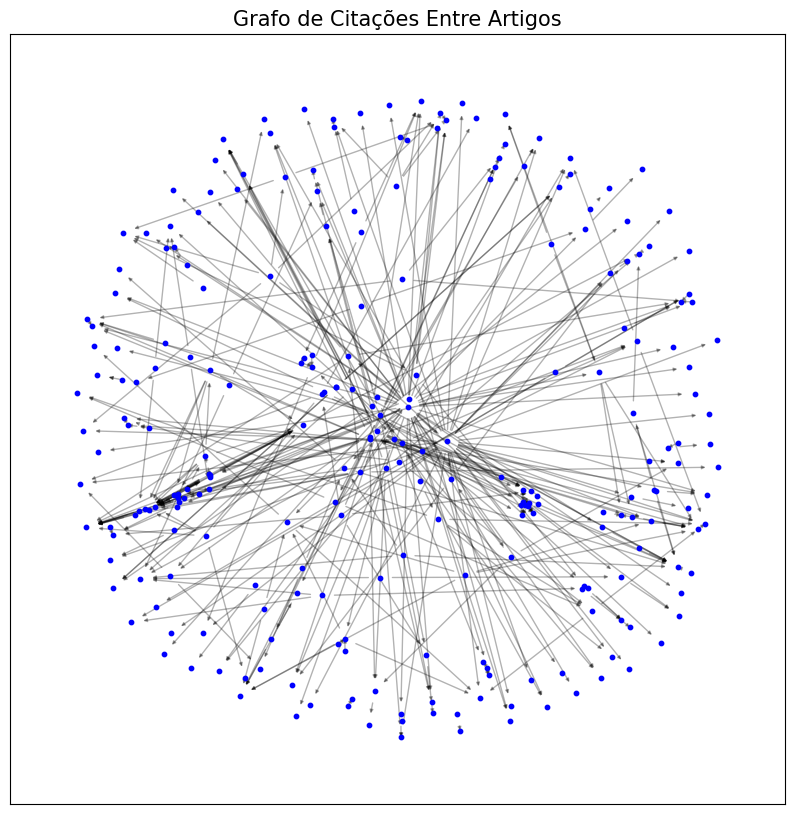

2 a) Densidade do Grafo

Densidade do Grafo Dirigido: 0.0021951050700910945
Densidade do Grafo Não Dirigido: 0.004390210140182189


2 b) Grau dos vértices
Grau de Entrada Médio: 3.0073
Grau de Saída Médio: 3.0073


c) Componentes Conexos
Componentes Fortemente Conectados: 1369
Componentes Fracamente Conectados: 16


d) Caminhos e Ciclos
Ciclos presentes no grafo: [[1248, 1247], [976, 975]]




In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import plotly.graph_objects as go
import numpy as np

# Matheus S. Tallmann e Winicios Ivan Ulrich

def importacao_grafo(caminho, dirigido):
    # Lê o arquivo sem cabeçalho
    arestas = pd.read_csv(caminho, sep=" ", header=None, names=["origem", "destino"])

    if dirigido:
        g = nx.from_pandas_edgelist(arestas, source="origem", target="destino", create_using=nx.DiGraph())
    else:
        g = nx.from_pandas_edgelist(arestas, source="origem", target="destino", create_using=nx.Graph())
    
    return g


# Criando/importando o grafo de Relações de Usuários do Deezer
grafoArtigos = importacao_grafo('C:\\Users\\Matheus\\Documents\\Grafos\\scientometrics\\scientometrics.net', True)

###################################################################################################################################################################################
###################################################################################################################################################################################

def desenhar_grafo(grafo, titulo, amostra=None):
    if amostra and len(grafo.nodes) > amostra:
        nos_amostrados = list(grafo.nodes)[:amostra]
        grafo = grafo.subgraph(nos_amostrados)
    plt.figure(figsize=(10, 10)) #Tamanho em polegadas#
    pos = nx.spring_layout(grafo, seed=100)
    nx.draw_networkx_nodes(grafo, pos, node_size=10, node_color="blue")    

    # Desenhar arestas com tamanho e opacidade personalizados
    nx.draw_networkx_edges(
        grafo,
        pos,
        width=1,               # Tamanho/espessura das arestas
        alpha=0.3,             # Opacidade das arestas
        edge_color="black",     # Cor das arestas
        arrowstyle="-|>",      # Estilo das setas
        arrowsize=5           # Tamanho das setas
    )
    plt.title(titulo, fontsize=15)
    plt.show()

desenhar_grafo(grafoArtigos, 'Grafo de Citações Entre Artigos', 250)
###################################################################################################################################################################################
###################################################################################################################################################################################
# 2 a) A densidade do grafo, que mede a proporção de arestas presentes em relação ao número máximo
# possível de arestas, pode ser calculada pela fórmula:
# Densidade = (2.M) / (N(N−1))

def calcular_densidade_dirigido(grafo):    
    n = grafo.number_of_nodes()
    m = grafo.number_of_edges()
    
    densidade = m / (n * (n - 1))
    return densidade

densidadeDirigido = calcular_densidade_dirigido(grafoArtigos)
print('2 a) Densidade do Grafo')
print(f"\nDensidade do Grafo Dirigido: {densidadeDirigido:}")

def calcular_densidade_nao_dirigido(grafo):
    n = grafo.number_of_nodes()  # Número de vértices
    m = grafo.number_of_edges()  # Número de arestas
    
    densidade = (2 * m) / (n * (n - 1))
    return densidade

densidadeNaoDirigido = calcular_densidade_nao_dirigido(grafoArtigos)
print(f"Densidade do Grafo Não Dirigido: {densidadeNaoDirigido:}\n\n")
###################################################################################################################################################################################
###################################################################################################################################################################################
# 2 b) Grau de Entrada: Número médio de citações que um artigo recebe.
# Grau de Saída: Número médio de citações que um artigo faz.

def calcular_grau_medio(grafo):        
    n = grafo.number_of_nodes()
        
    grau_entrada_total = sum(dict(grafo.in_degree()).values()) # Entrada
    grau_saida_total = sum(dict(grafo.out_degree()).values()) # Saída

    # Graus médios
    grau_entrada_medio = grau_entrada_total / n
    grau_saida_medio = grau_saida_total / n

    return grau_entrada_medio, grau_saida_medio

# Calcular graus médios
grau_entrada, grau_saida = calcular_grau_medio(grafoArtigos)
print('2 b) Grau dos vértices')
print(f"Grau de Entrada Médio: {grau_entrada:.4f}")
print(f"Grau de Saída Médio: {grau_saida:.4f}\n\n")
###################################################################################################################################################################################
###################################################################################################################################################################################
# 2 c) Determinar quantos componentes conexos existem no grafo, especialmente se o grafo não for fortemente conectado.

def calcular_componentes_conexos(grafo):
    # Componentes fortemente conectados
    componentes_fortes = list(nx.strongly_connected_components(grafo))
    num_componentes_fortes = len(componentes_fortes)

    # Componentes fracamente conectados
    componentes_fracos = list(nx.weakly_connected_components(grafo))
    num_componentes_fracos = len(componentes_fracos)

    return num_componentes_fortes, num_componentes_fracos


componentes_fortes, componentes_fracos = calcular_componentes_conexos(grafoArtigos)
print('c) Componentes Conexos')
print(f"Componentes Fortemente Conectados: {componentes_fortes}")
print(f"Componentes Fracamente Conectados: {componentes_fracos}\n\n")
###################################################################################################################################################################################
###################################################################################################################################################################################
# 2 d) Identificar a presença de ciclos. 
print('d) Caminhos e Ciclos')
ciclos = list(nx.simple_cycles(grafoArtigos))
print(f"Ciclos presentes no grafo: {ciclos}\n\n")

# Calcular a média do comprimento dos caminhos mais curtos entre os pares de vértices. 

def grafico_distancia_pares(grafo, dirigido=False, titulo="Distância Média e Distribuição"):
    """
    Calcula a distância média e a distribuição das distâncias entre todos os vértices de uma rede.
    Plota a distribuição das distâncias.
    """
    if dirigido:
        # Calcula as distâncias para grafos dirigidos
        distancias = dict(nx.all_pairs_shortest_path_length(grafo))
    else:
        # Calcula as distâncias para grafos não dirigidos
        distancias = dict(nx.all_pairs_shortest_path_length(grafo.to_undirected()))
    
    # Extrair todas as distâncias calculadas
    todas_distancias = []
    for origem, destinos in distancias.items():
        todas_distancias.extend(destinos.values())
    
    # Filtrar apenas distâncias finitas (desconsidera vértices desconectados)
    todas_distancias = [d for d in todas_distancias if d < float('inf')]
    
    # Calcular a distância média
    distancia_media = np.mean(todas_distancias)
    
    # Contar a frequência de cada distância
    distribuicao = Counter(todas_distancias)
    distancias_unicas = list(distribuicao.keys())
    frequencias = list(distribuicao.values())
    
    # Criar o gráfico de distribuição das distâncias
    fig = go.Figure(data=[
        go.Bar(
            x=distancias_unicas,
            y=frequencias,
            text=frequencias,
            textposition='outside',
            marker=dict(
                color=frequencias,
                colorscale="Viridis"
            )
        )
    ])
    fig.update_layout(
        title=dict(
            text=f"d) Distribuição das Distâncias - {titulo}",
            font=dict(size=20, color="black", family="Arial", weight="bold"),
            x=0.5  # Centraliza o título
        ),
        xaxis=dict(
            title="Distância",
            titlefont=dict(size=16, color="black", family="Arial", weight="bold"),
            rangeslider=dict(visible=True)  # Habilita barra de rolagem
        ),
        yaxis=dict(
            title="Quantidade",
            titlefont=dict(size=16, color="black", family="Arial", weight="bold")
        ),
        bargap=0.15  # Espaçamento entre as barras
    )
    fig.show()
    
    return distancia_media

grafico_distancia_pares(grafoArtigos, True, 'Artigos')
###################################################################################################################################################################################
###################################################################################################################################################################################
# 2 e) Centralidade de Grau: Medir a importância dos vértices com base no número de conexões.

def plotar_centralidade_agrupada(centralidade, titulo):    
    valores = list(centralidade.values())
    frequencias = Counter(valores)
    centralidades_unicas = list(frequencias.keys())
    quantidades = list(frequencias.values())

    # Criar o gráfico
    fig = go.Figure(data=[
        go.Bar(
            x=centralidades_unicas,
            y=quantidades,
            text=quantidades,
            textposition='outside',
            marker=dict(
                color=quantidades,
                colorscale="Viridis"
            )
        )
    ])

    # Configurar o layout do gráfico
    fig.update_layout(
        title=dict(
            text=titulo,
            font=dict(size=20, color="black", family="Arial", weight="bold"),
            x=0.5  # Centraliza o título
        ),
        xaxis=dict(
            title="Centralidade",
            titlefont=dict(size=16, color="black", family="Arial", weight="bold"),
            rangeslider=dict(visible=True)
        ),
        yaxis=dict(
            title="Quantidade de Vértices",
            titlefont=dict(size=16, color="black", family="Arial", weight="bold")
        ),
        bargap=0.15  # Espaçamento entre as barras
    )

    # Mostrar o gráfico
    fig.show()

# Calcular centralidades
centralidade_entrada = nx.in_degree_centrality(grafoArtigos)
centralidade_saida = nx.out_degree_centrality(grafoArtigos)

# Plotar centralidade de entrada
plotar_centralidade_agrupada(centralidade_entrada, titulo="2 e) Distribuição da Centralidade de Grau - Entrada")

# Plotar centralidade de saída
plotar_centralidade_agrupada(centralidade_saida, titulo="2 e) Distribuição da Centralidade de Grau - Saída")    